In [1]:
from pyrosm import OSM, get_data
from pyrosm.data import sources
import numpy as np
import matplotlib.pyplot as plt

#get data of the city, region or country of interest
osm = OSM(get_data("Toronto"))

# # Prints a list of all cities that can be downloaded
# print(sources.cities.available)

In [2]:
nodes, edges = osm.get_network(network_type="driving", nodes=True)
restaurants = osm.get_pois(custom_filter={"amenity": ["restaurant"]})
# hospitals = osm.get_pois({"amenity": ["hospital"]})
# buildings = osm.get_buildings()

C:\Users\Alaa\.conda\envs\ox\lib\site-packages\pyrosm\pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(


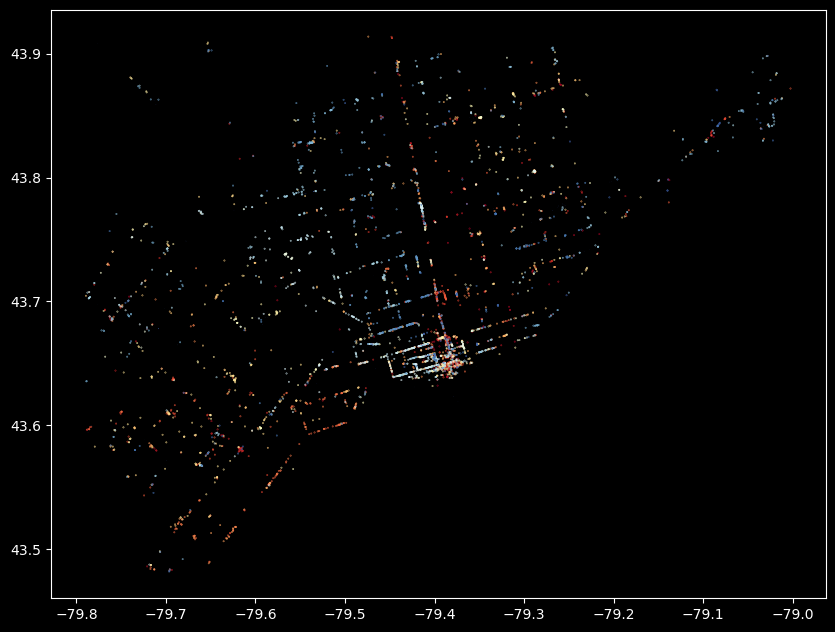

In [3]:
# Visualize the results
plt.style.use('dark_background') # for other available styles use: plt.style.available[:5]
ax = restaurants.plot(cmap='RdYlBu', markersize=0.1, legend=True, figsize=(10, 10))

In [4]:
# getting pandana Network object
G = osm.to_graph(nodes, edges, graph_type='pandana')

In [5]:
# Ensure all restaurants are represented as points
restaurants['geometry'] = restaurants.centroid
restaurants = restaurants.dropna(subset=['lon', 'lat'])

C:\Users\Alaa\AppData\Local\Temp\ipykernel_17940\949749417.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  restaurants['geometry'] = restaurants.centroid


In [6]:
# Precompute distances up to 2000 meters 
G.precompute(2000)

In [7]:
# Attach restaurants to Pandana graph
G.set_pois(category='restaurants', maxdist=2000, maxitems=10, 
           x_col=restaurants.lon, y_col=restaurants.lat)

C:\Users\Alaa\.conda\envs\ox\lib\site-packages\pandana\network.py:660: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
C:\Users\Alaa\.conda\envs\ox\lib\site-packages\pandana\network.py:668: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):


In [8]:
# For each node in the network, find distances to 5 closest restaurants up to 2000 meters using fast contraction hierarchies algorithm implemented in Pandana
nearest_five = G.nearest_pois(2000, "restaurants", num_pois=5)
nearest_five.tail(10)

,1,2,3,4,5
10107127361,259.563995,398.519012,537.323975,558.140015,574.958008
10107178430,141.973007,179.606995,333.050995,370.796997,381.757996
10107178428,116.283997,153.917999,307.362000,345.108002,356.069000
10107178431,102.666000,140.300003,293.743988,331.489990,342.450989
10107170101,143.970993,164.184998,164.184998,164.184998,232.501999
10107170104,121.662003,141.876007,141.876007,141.876007,210.192993
10107170105,123.555000,143.768997,143.768997,143.768997,212.085999
10107170103,157.565002,177.779007,177.779007,177.779007,246.095993
10107181830,82.783997,172.970993,191.947998,193.697998,276.511993
10107181832,57.396999,147.584000,166.561005,168.311005,251.125000
